In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import cPickle

import re
import numpy as np
import scipy.interpolate as scinterpolate
import matplotlib.pyplot as plt

In [2]:
def interpolate(x, y, dt):
    x = np.array(x)
    y = np.array(y)

    f = scinterpolate.interp1d(x, y, kind='linear')

    newx = np.arange(x.min(), x.max(),step=dt)
    newy = f(newx)
    
    return newx, newy

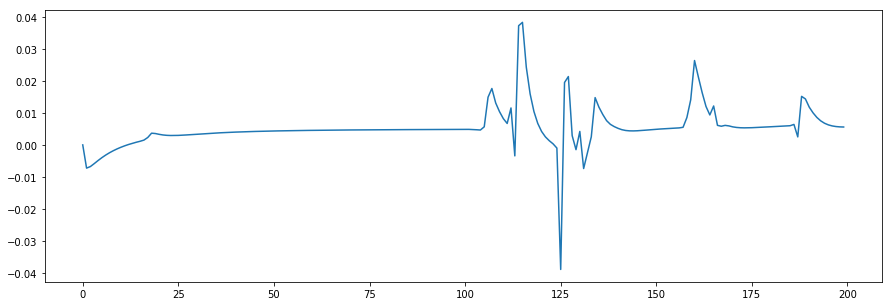

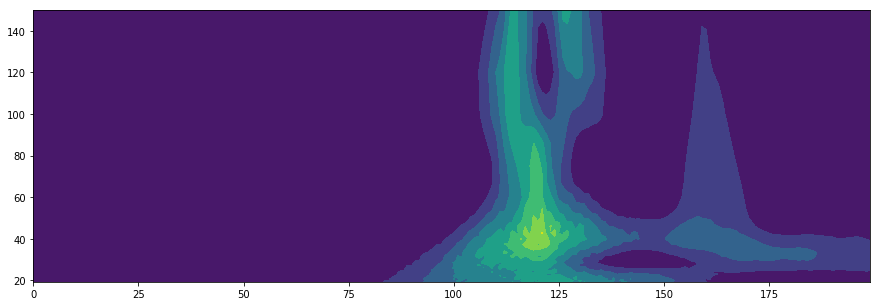

('cgau5', 'Wavelet frequencies', 150.0, 19.35483870967742, 'Hz')


In [19]:
def run(wavelet):


    dt = 1 # ms
    with open('/home/justas/Repositories/OlfactoryBulb/lfp.pkl') as f:
        t, y = cPickle.load(f)
        t, y = interpolate(t,y, dt)

    
    plt.subplots(figsize=(15, 5))
    plt.plot(t,y)
    
    # Wavelet range
    scales = np.arange(4,32,1)    
    
    cfs, frequencies = pywt.cwt(y, scales, wavelet, dt)
    frequencies *= 1000 # ms -> Hz    
    power = (abs(cfs)) ** 2
    
    plt.subplots(figsize=(15, 5))
    plt.contourf(t, frequencies, power)
    #plt.ylim(frequencies[-1],4)
    plt.show()

    print(wavelet, 'Wavelet frequencies', frequencies[0],frequencies[-1], 'Hz')

# run('cgau1')
run('cgau5')
# run('cgau8')
# run('mexh')
# run('shan')
# run('morl')
# run('gaus1')
# run('gaus5')
# run('gaus8')
# run('fbsp')
# run('cmor')